
---
### 🔍 Nasz cel
Nauczymy komputer rozróżniać **jabłka** i **śliwki** na podstawie dwóch cech:
- koloru (0 = ciemny, 1 = jasny)
- wagi (w gramach)

---
### 📊 Dane treningowe

In [10]:
import pandas as pd

# Dane uczące - więcej przykładów, żeby k=6 działało
dane = pd.DataFrame({
    'kolor': [1, 1, 1, 0, 0, 0, 0.8, 0.9, 0.2, 0.1],
    'waga': [150, 170, 160, 60, 80, 70, 140, 180, 65, 75],
    'owoc': ['jablko', 'jablko', 'jablko', 'sliwka', 'sliwka', 'sliwka', 'jablko', 'jablko', 'sliwka', 'sliwka']
})

print(f"Liczba przykładów: {len(dane)}")
dane

Liczba przykładów: 10


,kolor,waga,owoc
0,1.0,150,jablko
1,1.0,170,jablko
2,1.0,160,jablko
3,0.0,60,sliwka
4,0.0,80,sliwka
5,0.0,70,sliwka
6,0.8,140,jablko
7,0.9,180,jablko
8,0.2,65,sliwka
9,0.1,75,sliwka


Każdy wiersz to przykład, na podstawie którego komputer będzie się uczył.

---
### ⚙️ Budujemy pierwszy model Machine Learning — kNN
Użyjemy najprostszego możliwego modelu: **k-Nearest Neighbors (kNN)**.
Działa on bardzo intuicyjnie: nowy punkt (owoc) zostaje przypisany do klasy, do której należą jego najbliżsi sąsiedzi w danych uczących.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Dane wejściowe (cechy) i etykiety (klasy)
X = dane[['kolor', 'waga']]
y = dane['owoc']

# Tworzymy model kNN z 1 sąsiadem (najprostszy możliwy)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

print("Model został nauczony!")

Model już się **nauczył** – zna przykłady jabłek i śliwek.

---
### 🍎 Sprawdźmy, co powie na nowy owoc!

In [ ]:
# Nowy owoc, którego nie widział wcześniej
nowy = pd.DataFrame({
    'kolor': [0],  # ciemny
    'waga': [120]  # średnia waga
})

wynik = model.predict(nowy)[0]
print(f"Przewidywany owoc: {wynik}")

---
### 🔎 Co się właśnie stało?
- Model porównał nowy owoc (ciemny, 120 g) z tymi, które już zna.
- Szukał najbliższego przykładu w swoich danych.
- Jeśli był to przykład śliwki — przewidział śliwkę, jeśli jabłka — jabłko.

To właśnie *uczenie na podstawie danych*! 🎉

Świetne pytanie 👌 — bardzo dobrze, że to zauważyłeś!

👉 **Nie, `n_neighbors` nie musi być nieparzyste**, ale **często wybiera się nieparzyste wartości — z praktycznych powodów**.

---

### 🔍 Dlaczego zwykle wybiera się nieparzyste `k`

W klasyfikacji binarnej (czyli gdy mamy tylko 2 klasy, np. *jabłko* vs *śliwka*):

* Jeśli `k` jest **parzyste**, może się zdarzyć **remis** – np. 2 jabłka i 2 śliwki wśród 4 sąsiadów.
* Wtedy model musi jakoś ten remis rozstrzygnąć (np. wybiera losowo albo według kolejności danych).
* Żeby tego uniknąć, wybiera się **nieparzyste `k`** (np. 1, 3, 5…), wtedy **zawsze jest większość**.

---

### 📊 Przykład:

| k | Najbliżsi sąsiedzi | Decyzja                |
| - | ------------------ | ---------------------- |
| 4 | 🟢🟢🔴🔴           | remis 😕               |
| 3 | 🟢🟢🔴             | większość 🟢 = klasa 1 |
| 5 | 🟢🟢🟢🔴🔴         | większość 🟢 = klasa 1 |

---

### 🧠 Ale uwaga:

* Jeśli masz **więcej niż dwie klasy**, remis może się zdarzyć nawet przy nieparzystym `k`.
  (np. 3 sąsiedzi: 🟢, 🔵, 🔴 – każda klasa po 1 punkt).
* Wtedy model rozwiązuje to automatycznie np. na podstawie odległości lub kolejności danych.

---

### ⚙️ W skrócie:

| Cecha           | Wartość                                          |
| --------------- | ------------------------------------------------ |
| `k` parzyste    | możliwe remisy przy 2 klasach                    |
| `k` nieparzyste | unikasz remisów (często preferowane)             |
| duże `k`        | bardziej “gładkie” decyzje, ale mniej precyzyjne |
| małe `k`        | bardziej szczegółowe, ale podatne na błędy       |

---

Chcesz, żebym Ci pokazał **na prostym wykresie**, jak zmienia się granica decyzyjna przy `k=1`, `k=3` i `k=6`?
To świetnie obrazuje, dlaczego nieparzyste `k` są zwykle lepsze.


➡️ **Spróbuj teraz sam!**
- Zmień wagę np. na 180 i sprawdź, co model przewidzi.
- Zmieniaj `n_neighbors` na 2, 3 itd., żeby zobaczyć różnice.

To właśnie pierwszy krok w nauce ML 💪

---
## ⚠️ Ważna zasada k-NN

**k nie może być większe niż liczba przykładów treningowych!**

Jeśli mamy tylko 4 przykłady, to maksymalne k = 4.
- Z 4 przykładami: k = 1, 2, 3, 4 ✅
- Z 4 przykładami: k = 5, 6, 7... ❌

Dlatego dodaliśmy więcej danych - teraz mamy 10 przykładów, więc k=6 będzie działać! 🎉

---

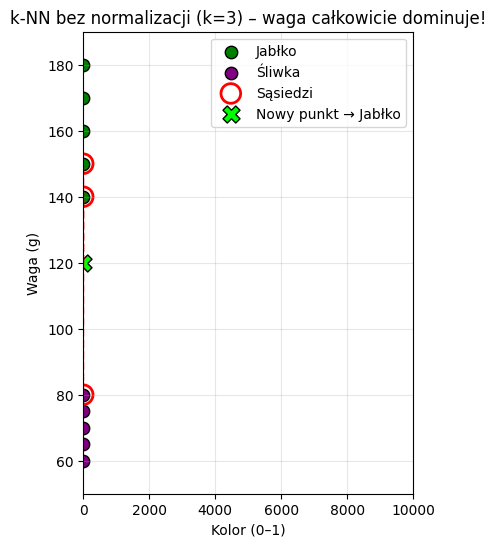

In [ ]:
# 🔹 Wizualizacja – jak k-NN myli się, gdy dane NIE są znormalizowane (ze sztucznym zachowaniem skali)

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Dane oryginalne (bez normalizacji)
X = dane[['kolor', 'waga']].values
y = dane['owoc'].map({'jablko': 0, 'sliwka': 1}).values

# Nowy punkt
nowy_punkt = np.array([[0.4, 120]])

def visualize_without_normalization(k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    # Przewidź klasę nowego punktu
    przewidziana = model.predict(nowy_punkt)[0]
    dystanse, indeksy = model.kneighbors(nowy_punkt)

    # 🔸 Rysunek
    plt.figure(figsize=(8,6))
    plt.title(f"k-NN bez normalizacji (k={k}) – waga całkowicie dominuje!", fontsize=12)
    plt.xlabel("Kolor (0–1)")
    plt.ylabel("Waga (g)")

    # Punkty uczące
    plt.scatter(X[y==0,0], X[y==0,1], c='green', s=80, edgecolor='k', label='Jabłko')
    plt.scatter(X[y==1,0], X[y==1,1], c='purple', s=80, edgecolor='k', label='Śliwka')

    # Sąsiedzi – czerwone obwódki
    plt.scatter(X[indeksy[0],0], X[indeksy[0],1],
                facecolors='none', edgecolors='red', s=200, linewidths=2, label='Sąsiedzi')

    # Linie od nowego punktu
    for i in indeksy[0]:
        plt.plot([nowy_punkt[0,0], X[i,0]], [nowy_punkt[0,1], X[i,1]], 'r--', alpha=0.7)

    # Nowy punkt
    plt.scatter(nowy_punkt[0,0], nowy_punkt[0,1],
                c='red' if przewidziana==1 else 'lime', s=150, edgecolor='black', marker='X',
                label=f"Nowy punkt → {'Śliwka' if przewidziana==1 else 'Jabłko'}")

    # 🔸 KLUCZOWA CZĘŚĆ – pokaż prawdziwe proporcje osi
    plt.xlim(-0.1, 10000.1)
    plt.ylim(50, 190)
    plt.gca().set_aspect(100, adjustable='box')  # 👈 ogromna różnica: 1 jednostka koloru = 100 jednostek wagi

    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()

# 🔸 Uruchom
visualize_without_normalization(k=3)


📋 Dane oryginalne:


,kolor,waga,owoc
0,1.0,150,jablko
1,1.0,170,jablko
2,1.0,160,jablko
3,0.0,60,sliwka
4,0.0,80,sliwka
5,0.0,70,sliwka
6,0.8,140,jablko
7,0.9,180,jablko
8,0.2,65,sliwka
9,0.1,75,sliwka



📊 Dane po normalizacji:


,kolor,waga,owoc
0,1.0,0.750000,jablko
1,1.0,0.916667,jablko
2,1.0,0.833333,jablko
3,0.0,0.000000,sliwka
4,0.0,0.166667,sliwka
5,0.0,0.083333,sliwka
6,0.8,0.666667,jablko
7,0.9,1.000000,jablko
8,0.2,0.041667,sliwka
9,0.1,0.125000,sliwka


c:\od\OneDrive - Politechnika Warszawska\P3\ALX\Materialy\AIForAll\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


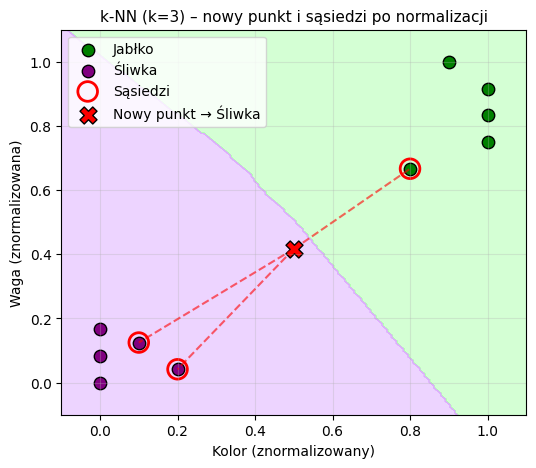

In [37]:
# 🔹 Wizualizacja k-NN po normalizacji – z nowym punktem i sąsiadami

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 1️⃣ Dane uczące
dane = pd.DataFrame({
    'kolor': [1, 1, 1, 0, 0, 0, 0.8, 0.9, 0.2, 0.1],
    'waga': [150, 170, 160, 60, 80, 70, 140, 180, 65, 75],
    'owoc': ['jablko', 'jablko', 'jablko', 'sliwka', 'sliwka', 'sliwka', 'jablko', 'jablko', 'sliwka', 'sliwka']
})

print("📋 Dane oryginalne:")
display(dane)

# 2️⃣ Normalizacja (Min-Max)
scaler = MinMaxScaler()
X = dane[['kolor', 'waga']]
X_norm = scaler.fit_transform(X)

dane_norm = pd.DataFrame(X_norm, columns=['kolor', 'waga'])
dane_norm['owoc'] = dane['owoc']

print("\n📊 Dane po normalizacji:")
display(dane_norm)

# 3️⃣ Przygotowanie danych
Xn = dane_norm[['kolor', 'waga']].values
y = dane_norm['owoc'].map({'jablko': 0, 'sliwka': 1}).values

# Nowy punkt (blisko granicy – 2 śliwki, 1 jabłko)
nowy_punkt = scaler.transform([[0.5, 110]])

# 🔹 Funkcja wizualizująca sąsiadów i granice
def visualize_neighbors_normalized(k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xn, y)

    # Znajdź najbliższych sąsiadów
    dystanse, indeksy = model.kneighbors(nowy_punkt)
    przewidziana = model.predict(nowy_punkt)[0]

    # Rysunek
    plt.figure(figsize=(6,5))
    plt.title(f"k-NN (k={k}) – nowy punkt i sąsiedzi po normalizacji", fontsize=11)
    plt.xlabel("Kolor (znormalizowany)")
    plt.ylabel("Waga (znormalizowana)")

    # Granice decyzyjne
    x_min, x_max = Xn[:, 0].min() - 0.1, Xn[:, 0].max() + 0.1
    y_min, y_max = Xn[:, 1].min() - 0.1, Xn[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    cmap_light = ListedColormap(["#aaffaa", "#ddaaff"])
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

    # Punkty treningowe
    plt.scatter(Xn[y==0, 0], Xn[y==0, 1], c='green', edgecolor='k', s=80, label='Jabłko')
    plt.scatter(Xn[y==1, 0], Xn[y==1, 1], c='purple', edgecolor='k', s=80, label='Śliwka')

    # Sąsiedzi (z czerwonymi obwódkami)
    plt.scatter(Xn[indeksy[0], 0], Xn[indeksy[0], 1],
                facecolors='none', edgecolors='red', s=200, linewidths=2, label='Sąsiedzi')

    # Linie odległości od nowego punktu do sąsiadów
    for i in indeksy[0]:
        plt.plot([nowy_punkt[0, 0], Xn[i, 0]], [nowy_punkt[0, 1], Xn[i, 1]], 'r--', alpha=0.6)

    # Nowy punkt (duży X)
    plt.scatter(nowy_punkt[0, 0], nowy_punkt[0, 1],
                c='red' if przewidziana==1 else 'lime',
                s=150, edgecolor='black', marker='X',
                label=f"Nowy punkt → {'Śliwka' if przewidziana==1 else 'Jabłko'}")

    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 🔸 Uruchom wizualizację
visualize_neighbors_normalized(k=3)


---

## 📘 Sekcja: Dlaczego i jak normalizować dane

---

### 🔹 Dlaczego trzeba normalizować?

W modelach takich jak **k-NN (k-Nearest Neighbors)**, decyzja o przynależności punktu do klasy zależy od **odległości między punktami** w przestrzeni cech.

Ale jeśli jedna cecha ma wartości np. `0–1` (kolor), a inna `60–180` (waga),
to ta druga (waga) będzie **dominować** — bo różnice w niej są liczbowo dużo większe.

➡️ Dla modelu oznacza to:

> „różnica 100 w wadze jest ważniejsza niż różnica 0.5 w kolorze"
> — nawet jeśli w rzeczywistości to **kolor** powinien mieć większe znaczenie!

---

### 🔹 Co robi normalizacja?

Normalizacja „ściska" dane do **wspólnej skali**, np. od `0` do `1` lub tak, żeby każda cecha miała średnią `0` i odchylenie `1`.
Dzięki temu wszystkie cechy mają **porównywalny wpływ** na obliczenia.

---

### 🧩 Najczęściej stosowane metody

#### 1️⃣ **Min–Max Scaling (normalizacja 0–1)**

To najprostsza i najczęściej używana metoda.
Przekształca każdą cechę tak, by mieściła się w zakresie `[0, 1]`.

📘 **Wzór:**

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

gdzie:

* $x$ – wartość oryginalna,
* $x_{min}$ – najmniejsza wartość tej cechy w danych,
* $x_{max}$ – największa wartość tej cechy,
* $x'$ – znormalizowana wartość (0–1).

✅ Po tej operacji:

* najmniejsza wartość cechy = 0
* największa wartość = 1

---

#### 2️⃣ **Standardizacja (Z-score Normalization)**

Ta metoda sprawia, że każda cecha ma **średnią = 0** i **odchylenie standardowe = 1**.

📘 **Wzór:**

$$x' = \frac{x - \mu}{\sigma}$$

gdzie:

* $\mu$ — średnia cechy,
* $\sigma$ — odchylenie standardowe,
* $x'$ — wartość po standaryzacji.

✅ Po tej operacji:

* dane nie mają jednostki (są „w liczbie odchyleń od średniej"),
* idealne np. dla regresji, SVM czy PCA.

---

### 🧮 Przykład (dla naszego datasetu)

| Kolor | Waga | Kolor (po normalizacji) | Waga (po normalizacji) |
| :---- | :--- | :---------------------: | :--------------------: |
| 0.0   | 60   |           0.00          |          0.00          |
| 0.9   | 180  |           0.90          |          1.00          |
| 0.4   | 120  |           0.40          |          0.50          |

➡️ Po normalizacji różnice są porównywalne,
więc k-NN będzie „patrzył" na obie cechy **z równą uwagą**.

---

### 🔹 W Pythonie

Wystarczy użyć:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
```

lub dla standardyzacji:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
```

---

### 🎯 Podsumowanie

| Metoda             | Zakres wartości  | Użycie                                        |
| :----------------- | :--------------- | :-------------------------------------------- |
| **MinMaxScaler**   | 0–1              | Najczęściej do k-NN, sieci neuronowych        |
| **StandardScaler** | wartości wokół 0 | Dla modeli liniowych, SVM, PCA                |
| **Bez skalowania** | ❌ duży błąd      | Model „faworyzuje" cechy z dużymi wartościami |

---

 https://www.youtube.com/watch?v=0p0o5cmgLdE

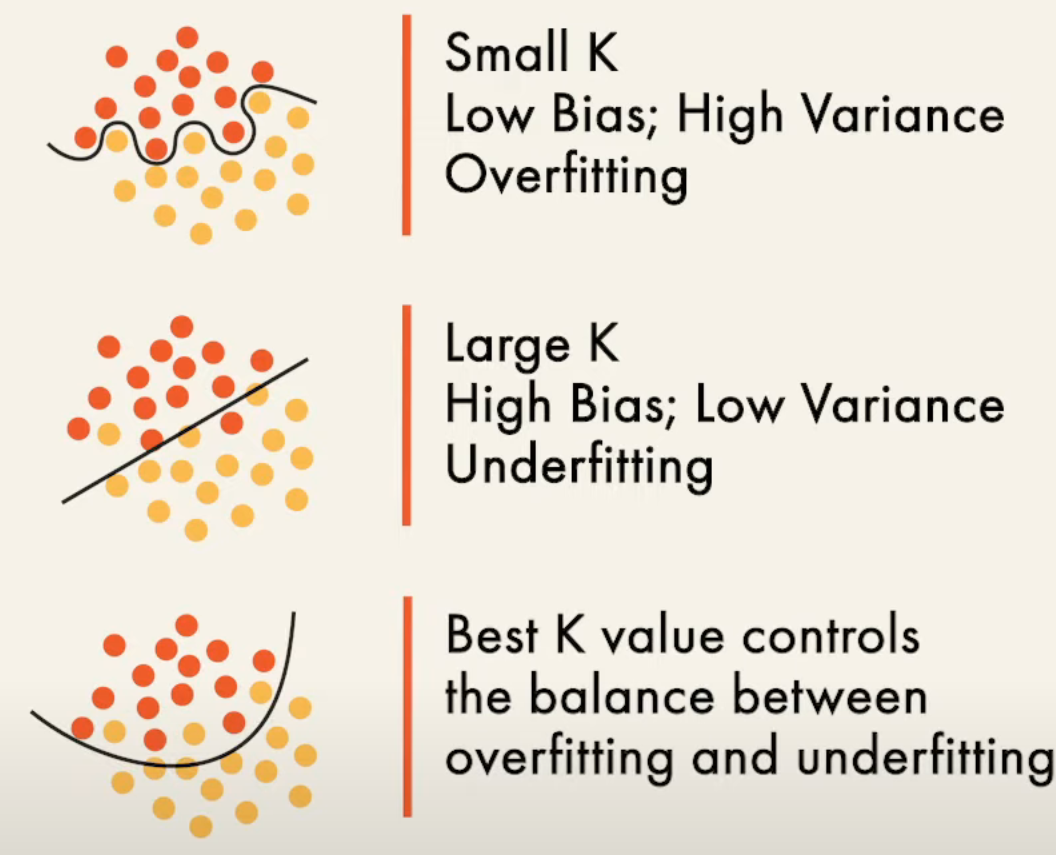

Ten obrazek pokazuje **jak wybór liczby sąsiadów (K) wpływa na zachowanie algorytmu k-NN** — czyli na to, czy model jest **zbyt „nerwowy”** (overfitting) czy **zbyt uogólniony** (underfitting).
Zobaczmy po kolei 👇

---

## 🔹 1️⃣ Małe K → np. k=1, k=2

➡️ **Small K: Low Bias; High Variance → Overfitting**

🔍 Co to znaczy:

* **Model patrzy tylko na najbliższych 1–2 sąsiadów.**
* Każdy pojedynczy punkt bardzo mocno wpływa na decyzję.
* Granica między klasami jest **poszarpana i niestabilna** – zmienia się przy każdym małym punkcie.
* Model bardzo dobrze dopasowuje się do danych treningowych, ale **słabo uogólnia nowe dane.**

📈 To właśnie **overfitting (przeuczenie)** – model „uczy się na pamięć”, zamiast zrozumieć ogólny wzór.

💬 Przykład:
Nowe jabłko trochę cięższe niż zwykle może zostać błędnie uznane za śliwkę, bo akurat najbliższy punkt w treningu był śliwką.

---

## 🔹 2️⃣ Duże K → np. k=10, k=20

➡️ **Large K: High Bias; Low Variance → Underfitting**

🔍 Co to znaczy:

* Model patrzy na wielu sąsiadów naraz.
* Decyzja to „średnia” z dużego obszaru danych.
* Granica między klasami jest **bardzo gładka, prawie liniowa**.
* Model **nie zauważa lokalnych różnic** między klasami.

📈 To **underfitting (niedouczenie)** – model jest zbyt prosty, nie wychwytuje niuansów w danych.

💬 Przykład:
Model uznaje, że wszystkie owoce o wadze powyżej 120 g to jabłka, nawet jeśli w tej grupie są też śliwki.

---

## 🔹 3️⃣ Optymalne K

➡️ **Best K value controls the balance between overfitting and underfitting**

🔍 Idea:

* Szukasz takiego `K`, które **równoważy**:

  * *elastyczność* (reagowanie na dane),
  * *stabilność* (odporność na przypadkowe punkty).
* Zwykle `K` wybiera się **eksperymentalnie**, np. testując wartości `K=1..20` i sprawdzając dokładność na danych testowych (cross-validation).

---

## 🔸 Podsumowanie w skrócie

| K           | Bias (błąd systematyczny) | Variance (niestabilność) | Zachowanie                        |
| ----------- | ------------------------- | ------------------------ | --------------------------------- |
| Małe K      | niskie                    | wysokie                  | Overfitting – „zbyt dopasowany”   |
| Duże K      | wysokie                   | niskie                   | Underfitting – „zbyt uproszczony” |
| Optymalne K | balans                    | balans                   | Dobre uogólnienie                 |

---

💡 **W praktyce:**

* Startujesz od małego K (np. 1, 3, 5)
* Mierzysz dokładność (accuracy) na zbiorze testowym
* Wybierasz `K`, które daje najlepsze wyniki – nie za małe, nie za duże

---
 